## Data Preperation

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Load the dataset
file_path = "D:\Coding\Energy-Management_Project\data\data_15min.csv"
df = pd.read_csv(file_path)

In [3]:
print("Initial shape:", df.shape)
print(df.dtypes)
print(df.isnull().sum().head())  # Show top missing values

Initial shape: (153810, 71)
utc_timestamp                          object
cet_cest_timestamp                     object
DE_KN_industrial1_grid_import         float64
DE_KN_industrial1_pv_1                float64
DE_KN_industrial1_pv_2                float64
                                       ...   
DE_KN_residential6_grid_export        float64
DE_KN_residential6_grid_import        float64
DE_KN_residential6_pv                 float64
DE_KN_residential6_washing_machine    float64
Unnamed: 70                            object
Length: 71, dtype: object
utc_timestamp                        0
cet_cest_timestamp                   0
DE_KN_industrial1_grid_import    88080
DE_KN_industrial1_pv_1           84659
DE_KN_industrial1_pv_2           84659
dtype: int64


In [4]:
# Convert timestamp to datetime and set index
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], utc=True, errors='coerce')
df.set_index('utc_timestamp', inplace=True)

In [5]:
# Filter only the required column

target_col = 'DE_KN_residential3_washing_machine'
df = df[[target_col]].copy()

In [6]:
# Rename target column
df.rename(columns={target_col: 'r3_wm'}, inplace=True)

In [7]:
# Drop missing value
df.dropna(inplace=True)

In [8]:
# check
print("Data after cleaning:")
print(df.head())
print("Data range:", df.index.min(), "to", df.index.max())
print("Data frequency check (first 5 diffs):\n", df.index.to_series().diff().head())

Data after cleaning:
                           r3_wm
utc_timestamp                   
2014-12-11 18:00:00+00:00    0.0
2014-12-11 18:15:00+00:00    0.0
2014-12-11 18:30:00+00:00    0.0
2014-12-11 18:45:00+00:00    0.0
2014-12-11 19:00:00+00:00    0.0
Data range: 2014-12-11 18:00:00+00:00 to 2018-06-06 11:00:00+00:00
Data frequency check (first 5 diffs):
 utc_timestamp
2014-12-11 18:00:00+00:00               NaT
2014-12-11 18:15:00+00:00   0 days 00:15:00
2014-12-11 18:30:00+00:00   0 days 00:15:00
2014-12-11 18:45:00+00:00   0 days 00:15:00
2014-12-11 19:00:00+00:00   0 days 00:15:00
Name: utc_timestamp, dtype: timedelta64[ns]


### Convert cumulative data into actual per-interval usage

In [10]:
# Convert cumulative to actual usage
df['r3_wm'] = df['r3_wm'].diff()

# Drop the first row which becomes NaN after diff
df.dropna(inplace=True)


In [12]:
# Optional sanity check for negative values
print("Negative values count:", (df['r3_wm'] < 0).sum())


df = df[df['r3_wm'] >= 0]  # or df['r3_wm'] = df['r3_wm'].clip(lower=0)


Negative values count: 0


## Data Viz

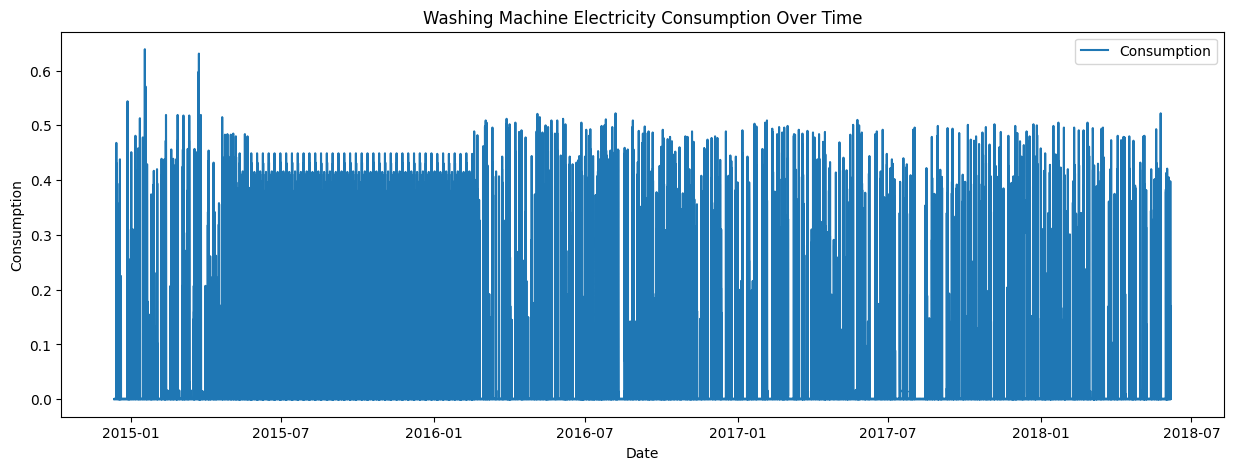

In [13]:
#Plot the time series consumption
plt.figure(figsize=(15,5))
plt.plot(df.index, df['r3_wm'], label='Consumption')
plt.title('Washing Machine Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

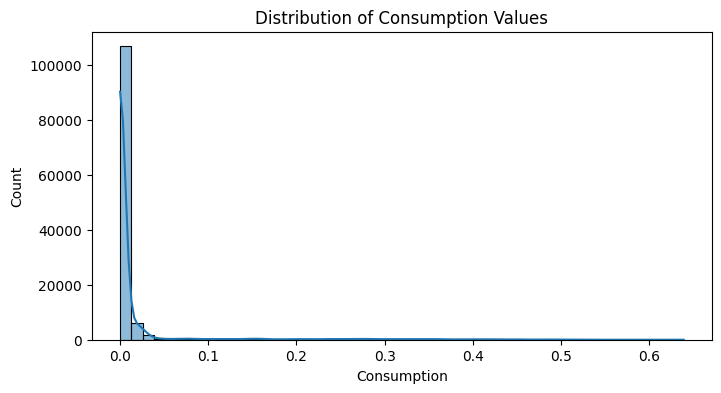

In [14]:
# Distribution plot of consumption
plt.figure(figsize=(8,4))
sns.histplot(df['r3_wm'], bins=50, kde=True)
plt.title('Distribution of Consumption Values')
plt.xlabel('Consumption')
plt.show()

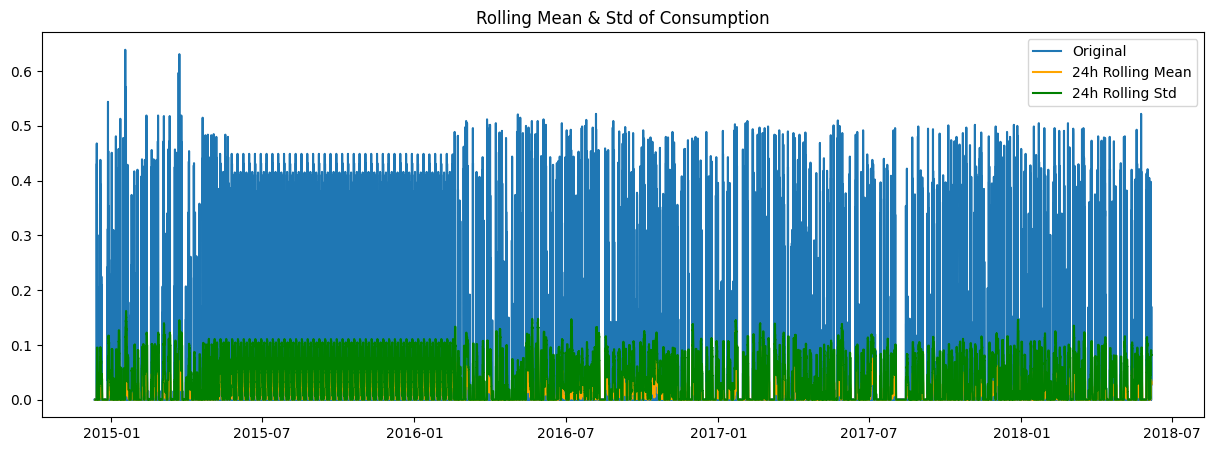

In [15]:
# Rolling mean and rolling std to check trend and seasonality

rolling_window = 96  # 96 * 15min = 24 hours
plt.figure(figsize=(15,5))
plt.plot(df['r3_wm'], label='Original')
plt.plot(df['r3_wm'].rolling(window=rolling_window).mean(), label='24h Rolling Mean', color='orange')
plt.plot(df['r3_wm'].rolling(window=rolling_window).std(), label='24h Rolling Std', color='green')
plt.title('Rolling Mean & Std of Consumption')
plt.legend()
plt.show()

## Time-Series Viz

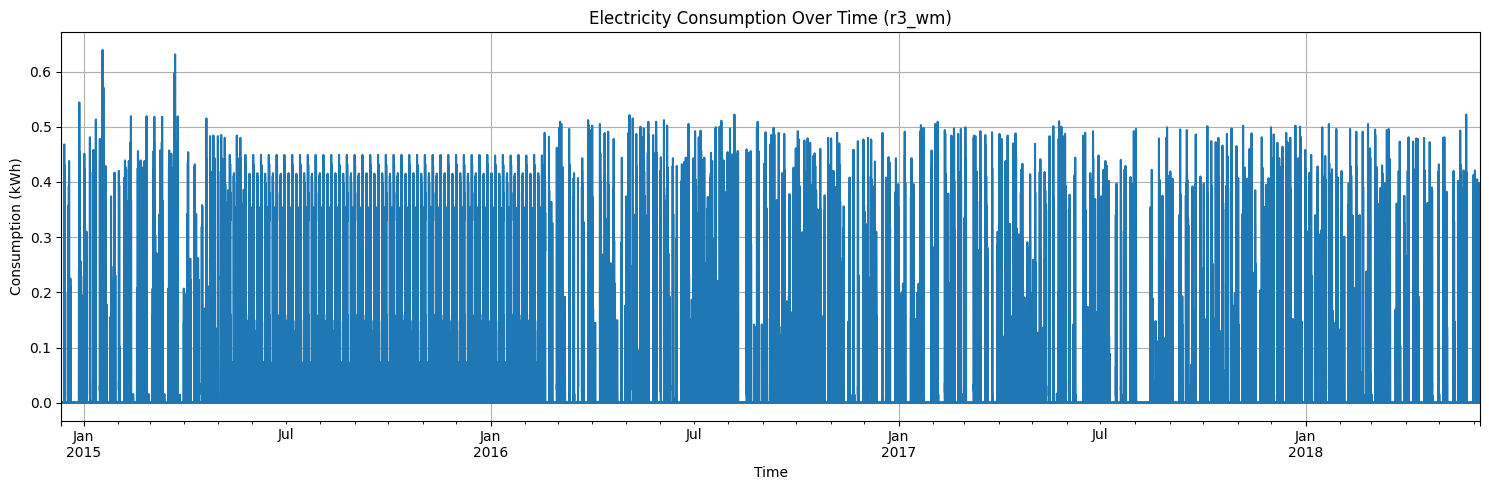

In [16]:
plt.figure(figsize=(15,5))
df['r3_wm'].plot()
plt.title("Electricity Consumption Over Time (r3_wm)")
plt.ylabel("Consumption (kWh)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

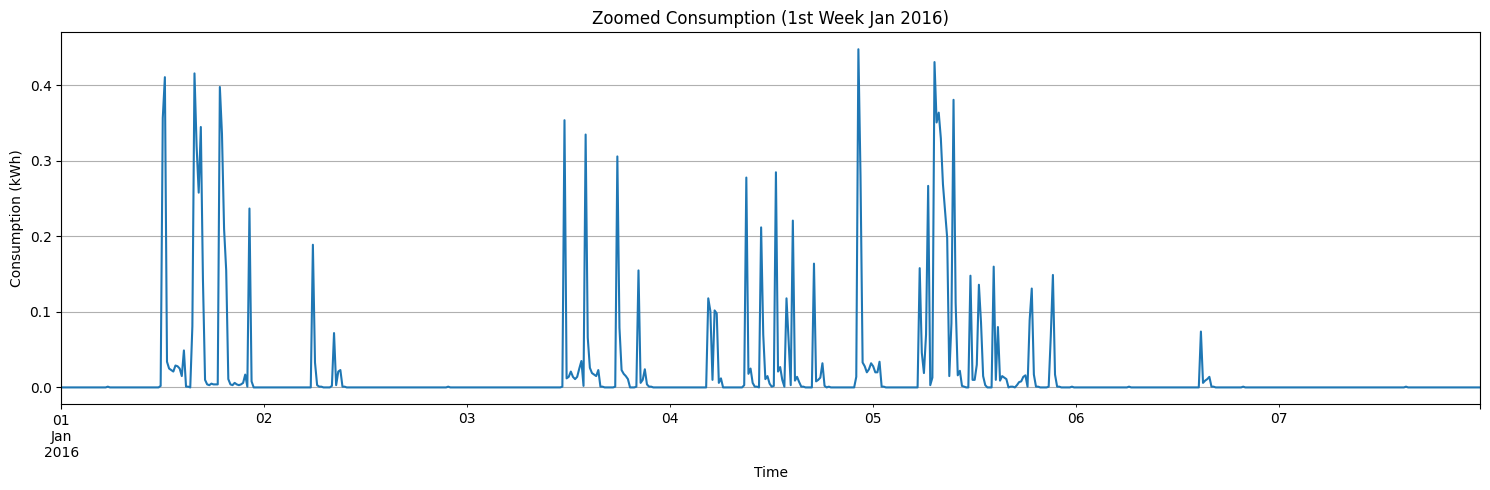

In [17]:
df_zoom = df['2016-01-01':'2016-01-07']
plt.figure(figsize=(15,5))
df_zoom['r3_wm'].plot()
plt.title("Zoomed Consumption (1st Week Jan 2016)")
plt.ylabel("Consumption (kWh)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()


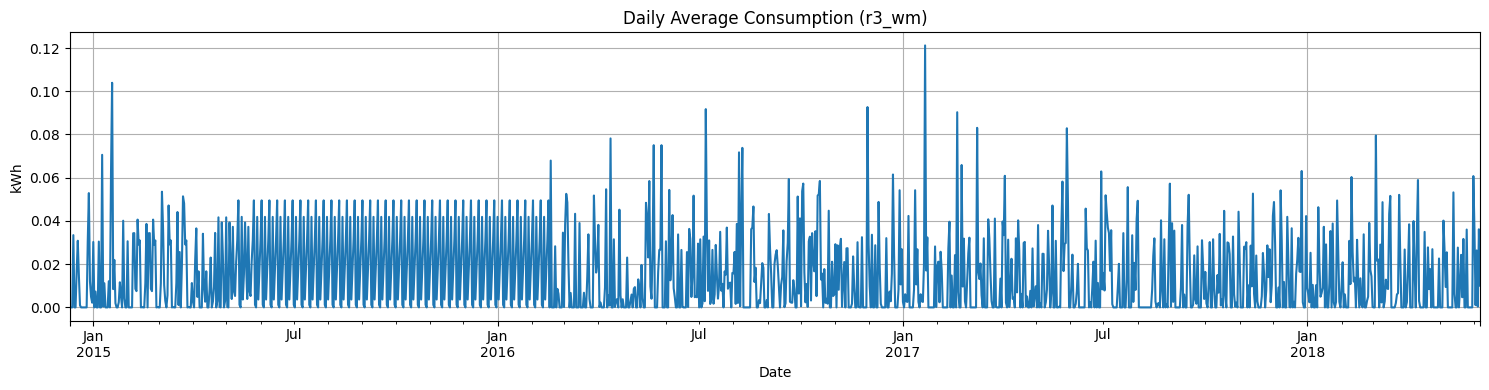

In [ ]:
# daily avg consumption(daily resampling)

df_daily = df['r3_wm'].resample('D').mean()

plt.figure(figsize=(15,4))
df_daily.plot()
plt.title("Daily Average Consumption (r3_wm)")
plt.ylabel("kWh")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()
